In [1]:
import warnings
warnings.filterwarnings('ignore')

## Objective 1 - Profile & QA the data
The first objective is to read in the AirBnB listings data, calculate basic profiling metrics, change column datatypes as necessary, and filter down to only Paris Listings.

In [2]:
import pandas as pd

### Objective 1 Tasks
#### 1. Import/Open the Listings.csv file

In [3]:
listings = pd.read_csv("Airbnb Data/Listings.csv", encoding="latin-1")  # setting the encoding to latin-1, utf-8 didn't work.
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


#### 2. Cast any date columns as a datetime format

In [4]:
listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [5]:
listings['host_response_time'].value_counts()

host_response_time
within an hour        83464
within a few hours    28891
within a day          23425
a few days or more    15150
Name: count, dtype: int64

In [6]:
# So the only "date column" is the "host_since" column

In [7]:
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


#### 3. Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

In [8]:
listings = listings[listings['city'] == 'Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


#### 4. QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [10]:
# So the "host_since" column has missing values
listings['host_since'].isnull().sum()

np.int64(33)

In [11]:
listings.describe().loc[['min', 'max', 'mean']][['accommodates', 'price']]

,accommodates,price
min,0.000000,0.000000
max,16.000000,12000.000000
mean,3.037997,113.096445


## Objective 2 - Prepare the data for visualization
The second objective is to produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

### Objective 2 Tasks
#### 1. Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

In [12]:
paris_listings_neighbourhood = listings[['neighbourhood', 'price']].groupby('neighbourhood').mean().sort_values(by='price', ascending=True).reset_index()
paris_listings_neighbourhood

,neighbourhood,price
0,Menilmontant,74.942257
1,Buttes-Chaumont,82.690182
2,Buttes-Montmartre,87.209479
3,Reuilly,89.058402
4,Popincourt,90.559459
5,Gobelins,98.110184
6,Observatoire,101.866801
7,Batignolles-Monceau,102.612702
8,Enclos-St-Laurent,102.967156
9,Vaugirard,106.831330


#### 2. Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

In [13]:
most_exp_neighbourhood = paris_listings_neighbourhood.iloc[-1]['neighbourhood']
paris_listings_accomodations = listings[listings['neighbourhood'] == most_exp_neighbourhood][['price', 'accommodates']].groupby('accommodates').mean().sort_values(by='accommodates').reset_index()
paris_listings_accomodations

,accommodates,price
0,0,0.000000
1,1,79.522222
2,2,155.103352
3,3,152.828767
4,4,212.096070
5,5,328.817073
6,6,355.508571
7,7,411.538462
8,8,405.518519
9,9,440.272727


#### 3. Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [14]:
paris_listings_over_time = listings[['host_since', 'price']].copy()
paris_listings_over_time['host_since_year'] = paris_listings_over_time['host_since'].dt.year
paris_listings_over_time = paris_listings_over_time.groupby('host_since_year')['price'].describe()[['count', 'mean']].reset_index()
paris_listings_over_time.columns = ['host_since_year', 'count', 'avg_price']
paris_listings_over_time

,host_since_year,count,avg_price
0,2008.0,4.0,77.750000
1,2009.0,106.0,159.641509
2,2010.0,416.0,125.031250
3,2011.0,1339.0,124.828230
4,2012.0,4592.0,111.578615
5,2013.0,8142.0,107.096414
6,2014.0,10922.0,100.253800
7,2015.0,12147.0,103.646250
8,2016.0,8871.0,114.159847
9,2017.0,4585.0,108.658888


## Objective 3 - Visualize the data and summarize findings
Your final objective is to build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

In [15]:
import matplotlib.pyplot as plt 

In [16]:
# Airbnb colors
color_abnb_red = '#ff5a60'
color_abnb_white = '#ffffff'
color_abnb_grey = '#484848'

### Objective 3 Tasks
#### 1. Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

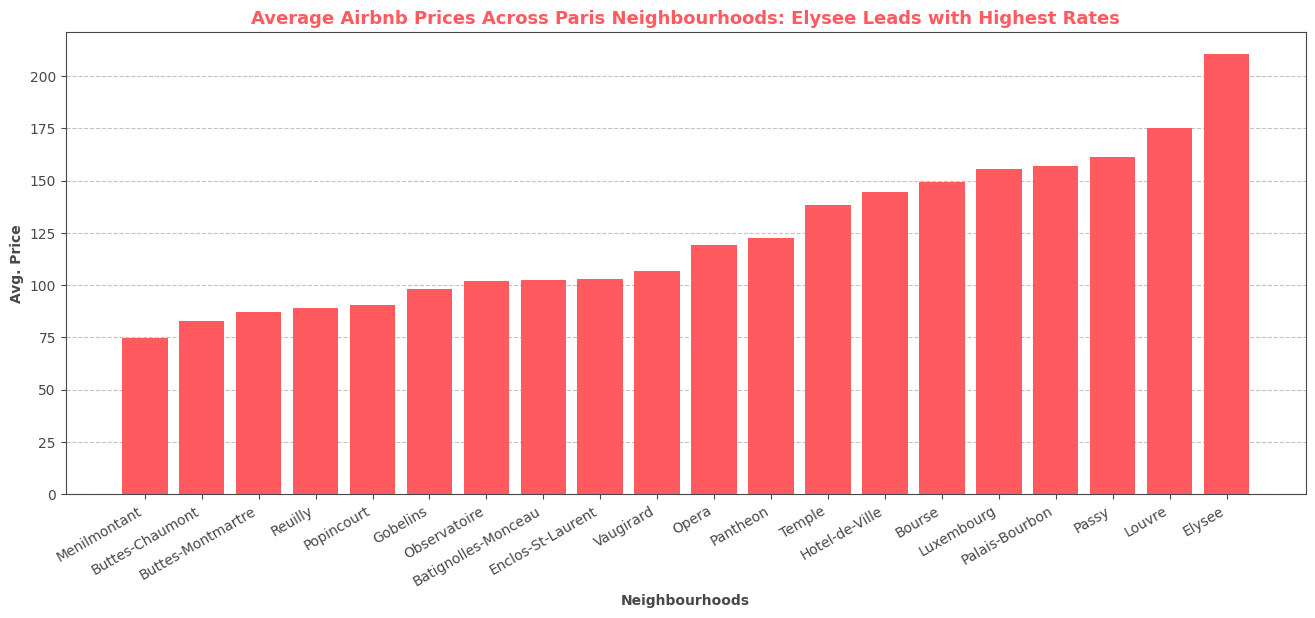

In [17]:
plt.figure(figsize=(16,6))

plt.title('Average Airbnb Prices Across Paris Neighbourhoods: Elysee Leads with Highest Rates', color=color_abnb_red, fontweight='bold', fontsize=13)
plt.xlabel("Neighbourhoods", color=color_abnb_grey, fontweight='bold')
plt.ylabel("Avg. Price", color=color_abnb_grey, fontweight='bold')

plt.bar(paris_listings_neighbourhood['neighbourhood'], paris_listings_neighbourhood['price'], color=color_abnb_red)

ax = plt.gca()
ax.set_xticklabels(paris_listings_neighbourhood['neighbourhood'], rotation=30, ha='right')
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', color=color_abnb_grey, alpha=0.33)
ax.tick_params(axis='x', colors=color_abnb_grey)
ax.tick_params(axis='y', colors=color_abnb_grey)
ax.spines['top'].set_color(color_abnb_grey)
ax.spines['bottom'].set_color(color_abnb_grey)
ax.spines['left'].set_color(color_abnb_grey)
ax.spines['right'].set_color(color_abnb_grey)

plt.show()

#### 2. Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

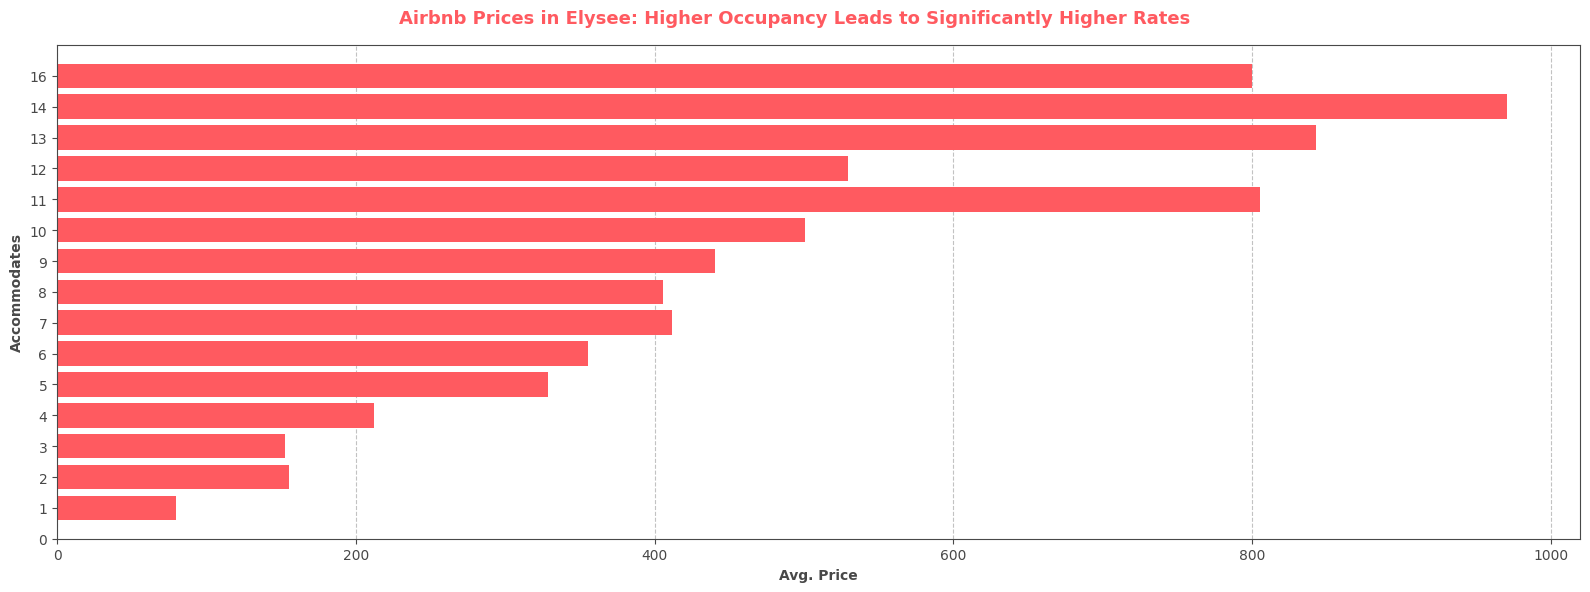

In [18]:
plt.figure(figsize=(16,6))

plt.suptitle('Airbnb Prices in Elysee: Higher Occupancy Leads to Significantly Higher Rates', color=color_abnb_red, fontweight='bold', fontsize=13, ha='center')
plt.xlabel("Avg. Price", color=color_abnb_grey, fontweight='bold')
plt.ylabel("Accommodates", color=color_abnb_grey, fontweight='bold')

plt.barh([str(v) for v in paris_listings_accomodations['accommodates']], paris_listings_accomodations['price'], color=color_abnb_red)

ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(axis='x', linestyle='--', color=color_abnb_grey, alpha=0.33)
ax.tick_params(axis='x', colors=color_abnb_grey)
ax.tick_params(axis='y', colors=color_abnb_grey)
ax.spines['top'].set_color(color_abnb_grey)
ax.spines['bottom'].set_color(color_abnb_grey)
ax.spines['left'].set_color(color_abnb_grey)
ax.spines['right'].set_color(color_abnb_grey)
ax.set_ylim(paris_listings_accomodations['accommodates'].min(), paris_listings_accomodations['accommodates'].max())

plt.tight_layout()
plt.show()

#### 3. Create two line charts:
- one showing the count of new hosts over time
- one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

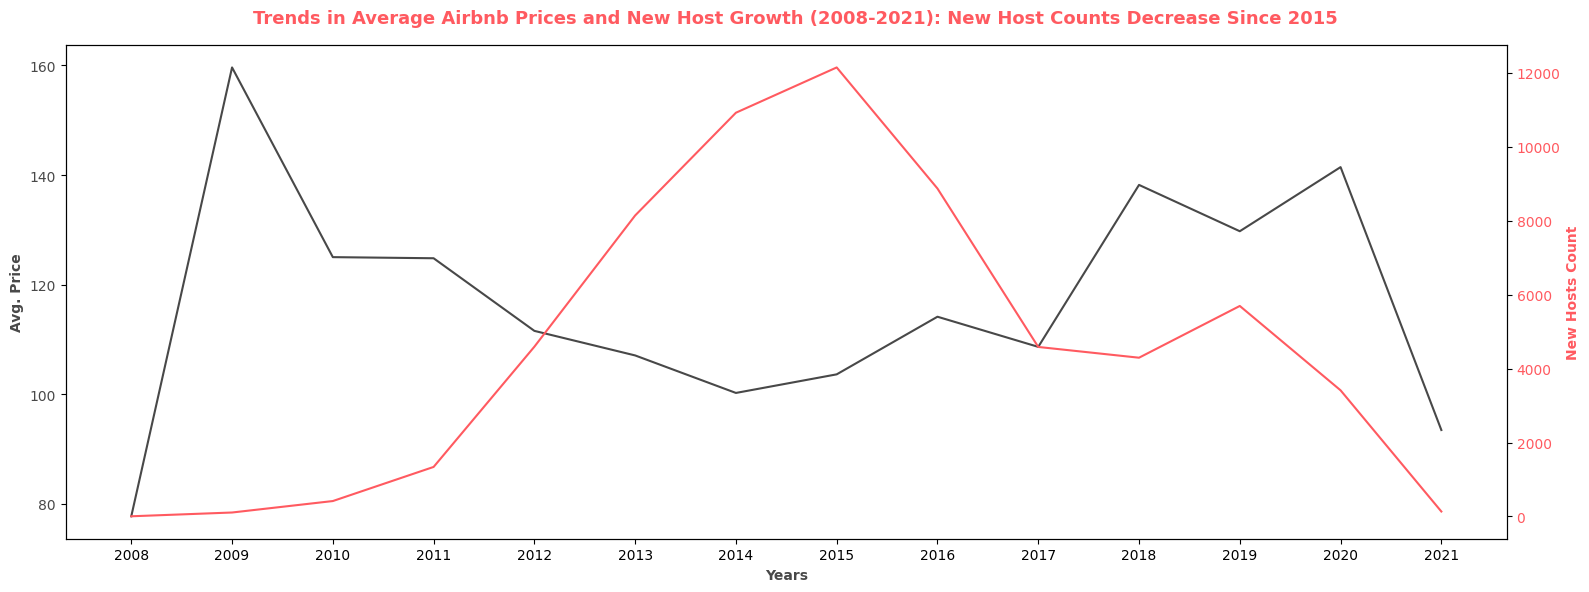

In [19]:
years = [str(int(y)) for y in paris_listings_over_time['host_since_year']]

fig, ax_price = plt.subplots(figsize=(16, 6))

plt.suptitle('Trends in Average Airbnb Prices and New Host Growth (2008-2021): New Host Counts Decrease Since 2015', color=color_abnb_red, fontweight='bold', fontsize=13, ha='center')
plt.xlabel("Years", color=color_abnb_grey, fontweight='bold')

ax_price.set_ylabel("Avg. Price", color=color_abnb_grey, fontweight='bold')
ax_price.plot(years, paris_listings_over_time['avg_price'], color=color_abnb_grey)
ax_price.tick_params(axis='y', labelcolor=color_abnb_grey)

ax_count = ax_price.twinx()
ax_count.set_ylabel('New Hosts Count', color=color_abnb_red, fontweight='bold')
ax_count.plot(years, paris_listings_over_time['count'], color=color_abnb_red)
ax_count.tick_params(axis='y', labelcolor=color_abnb_red)

plt.tight_layout()
plt.show()

#### 4.Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?

In [20]:
# It seems like people tend to host on Airbnb less than previous years after the 2015 regulations